In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Зададим липшицеву функцию и рассматриваемый отрезок
f = lambda x: 0.5 * x + 0.2 * np.cos(np.pi * x) + 0.2 * np.sin(2 * np.pi * x)
segment = [-2, 1]

In [46]:
# Определим количество партиций
partition = np.linspace(segment[0], segment[1], 1000)

In [47]:
# Оценка коэффициента Липшица
def estimate_L(f, h, partition):
    return 2 * np.max(np.abs(f(partition[:-1]) - f(partition[1:]))/h)

In [48]:
def find_global_extremum(f, segment, eps, iterations):

    partition = np.linspace(segment[0], segment[1], 1000)
    h = (partition[1:] - partition[:-1])[0]
    L = estimate_L(f, h, partition)

    u0 = segment[0]
    u1 = segment[1]
    g0 = f(u0) - L * np.abs(partition - u0)
    p0 = g0
    g1 = f(u1) - L * np.abs(partition - u1)
    p1 = np.maximum(p0, g1)

    p_arr = [p1]
    u_old = u1
    u_arr = [u_old]


    for iter in range(iterations):
        u = partition[np.argmin(p_arr[-1])]
        g = f(u) - L * np.abs(partition - u)

        p = np.maximum(p_arr[-1], g)
        p_arr.append(p)
        u_arr.append(u)

        if np.abs(u - u_old) < eps:
            break

        u_old = u

    return u, p_arr, u_arr, iter, partition

In [49]:
iters = 1000
epsilon = 1e-5

u, p_arr, u_arr, iter, partition = find_global_extremum(f, segment, epsilon, iters)

u, iter

(-1.2552552552552552, 58)

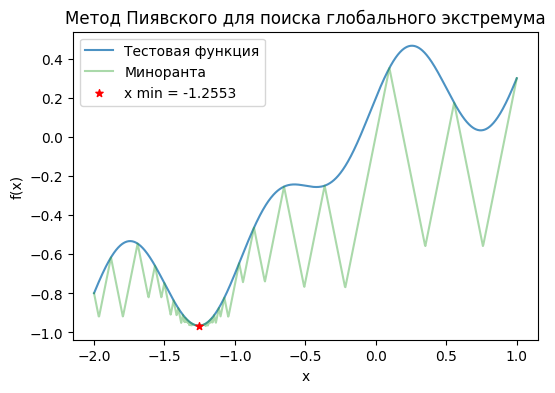

In [50]:
plt.figure(figsize=(6, 4))
plt.plot(partition, f(partition), color='tab:blue', label='Тестовая функция', alpha=0.8)
plt.plot(partition, p_arr[iter-1], color='tab:green', label='Миноранта', alpha=0.4)
plt.scatter(u, f(u), zorder=3, color='red', marker='*', s=30, label=f'x min = {round(u, 4)}')
plt.title('Метод Пиявского для поиска глобального экстремума')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()